In [356]:
import os
os.chdir('C:/Users/Kamar/Desktop/NH/ICT 423')

import warnings
warnings.filterwarnings('ignore')

In [357]:
#Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [358]:
# Load the data set
df= pd.read_csv('employee.csv')

In [359]:
df.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,1,0.38,0.53,2,157,3,0,0,sales,low,Yes
1,2,0.80,0.86,5,262,6,0,0,sales,medium,Yes
2,3,0.11,0.88,7,272,4,0,0,sales,medium,Yes
3,4,0.72,0.87,5,223,5,0,0,sales,low,Yes
4,5,0.37,0.52,2,159,3,0,0,sales,low,Yes


In [360]:
#dataset shape
df.shape

(14999, 11)

In [361]:
#checking the column name
df.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Attrition'],
      dtype='object')

In [362]:
#checking the data type
df.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
Attrition                 object
dtype: object

In [363]:
#Check If there are any missing values
df.isnull().any()
df.isnull().sum()
df.isnull().sum().sum()

Emp ID                   False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
Attrition                False
dtype: bool

In [364]:
#conversion of object data type to category
df['Attrition'] = df['Attrition'].astype('category')
df['dept'] = df['dept'].astype('category')
df['salary'] = df['salary'].astype('category')

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Emp ID                 14999 non-null  int64   
 1   satisfaction_level     14999 non-null  float64 
 2   last_evaluation        14999 non-null  float64 
 3   number_project         14999 non-null  int64   
 4   average_montly_hours   14999 non-null  int64   
 5   time_spend_company     14999 non-null  int64   
 6   Work_accident          14999 non-null  int64   
 7   promotion_last_5years  14999 non-null  int64   
 8   dept                   14999 non-null  category
 9   salary                 14999 non-null  category
 10  Attrition              14999 non-null  category
dtypes: category(3), float64(2), int64(6)
memory usage: 982.1 KB


In [366]:
#grouping the feature into categorical and numerical 

df_numerical = ['satisfaction_level','last_evaluation','number_project','average_montly_hours',
             'time_spend_company','Work_accident','promotion_last_5years']
df_categorical =['dept','salary','Attrition']

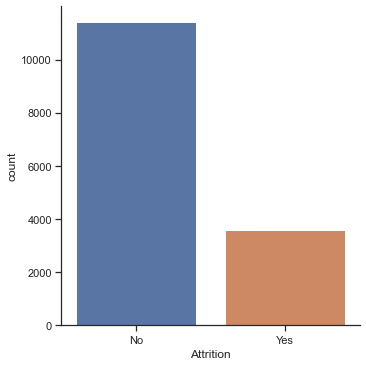

In [367]:
sns.catplot(x="Attrition", kind="count", data=df,orient='h')

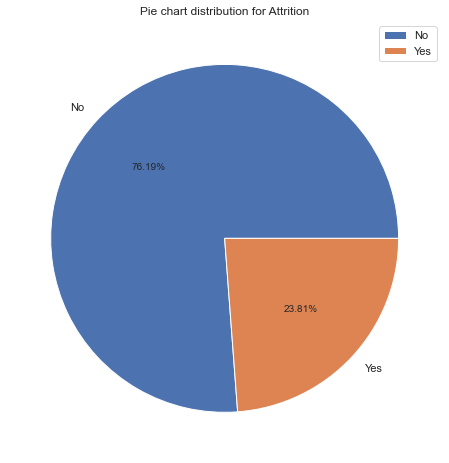

In [368]:
df_ =df['Attrition'].value_counts() 
plt.figure(figsize=(8,8))
plt.title("Pie chart distribution for Attrition")
plt.pie(df_.values, labels = df_ .index,autopct='%0.2f%%')
plt.legend()
plt.show()

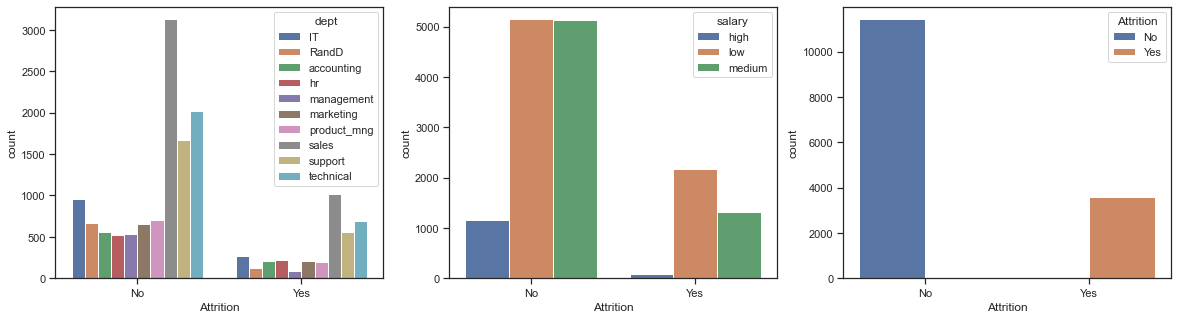

In [369]:
fig , ax = plt.subplots(1,3,figsize=(20,5))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,df_categorical):
    sns.countplot(x=df["Attrition"],hue=df[col],ax=axis)
plt.savefig("df_ca.png")

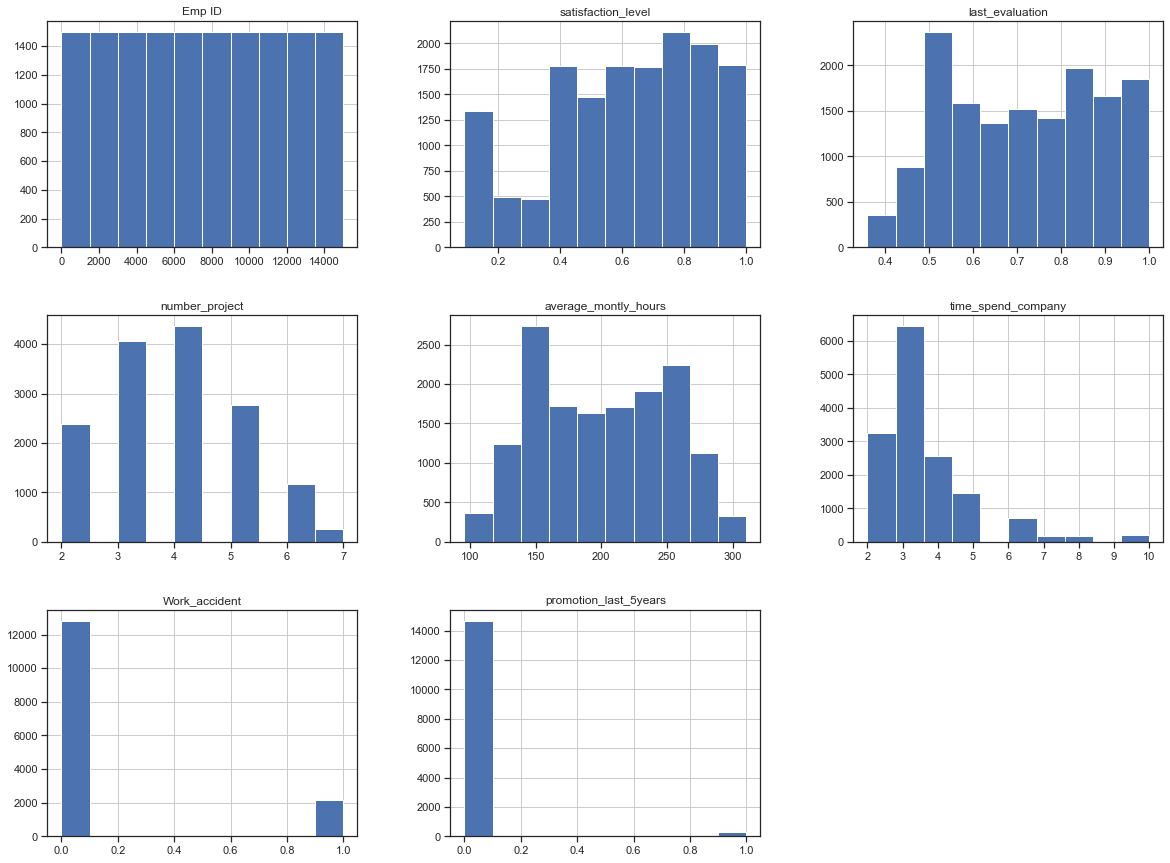

In [370]:
# Visualize the histogram of numerical variables
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
#plt.savefig("df_existing_histogram_plots.png")
plt.show()

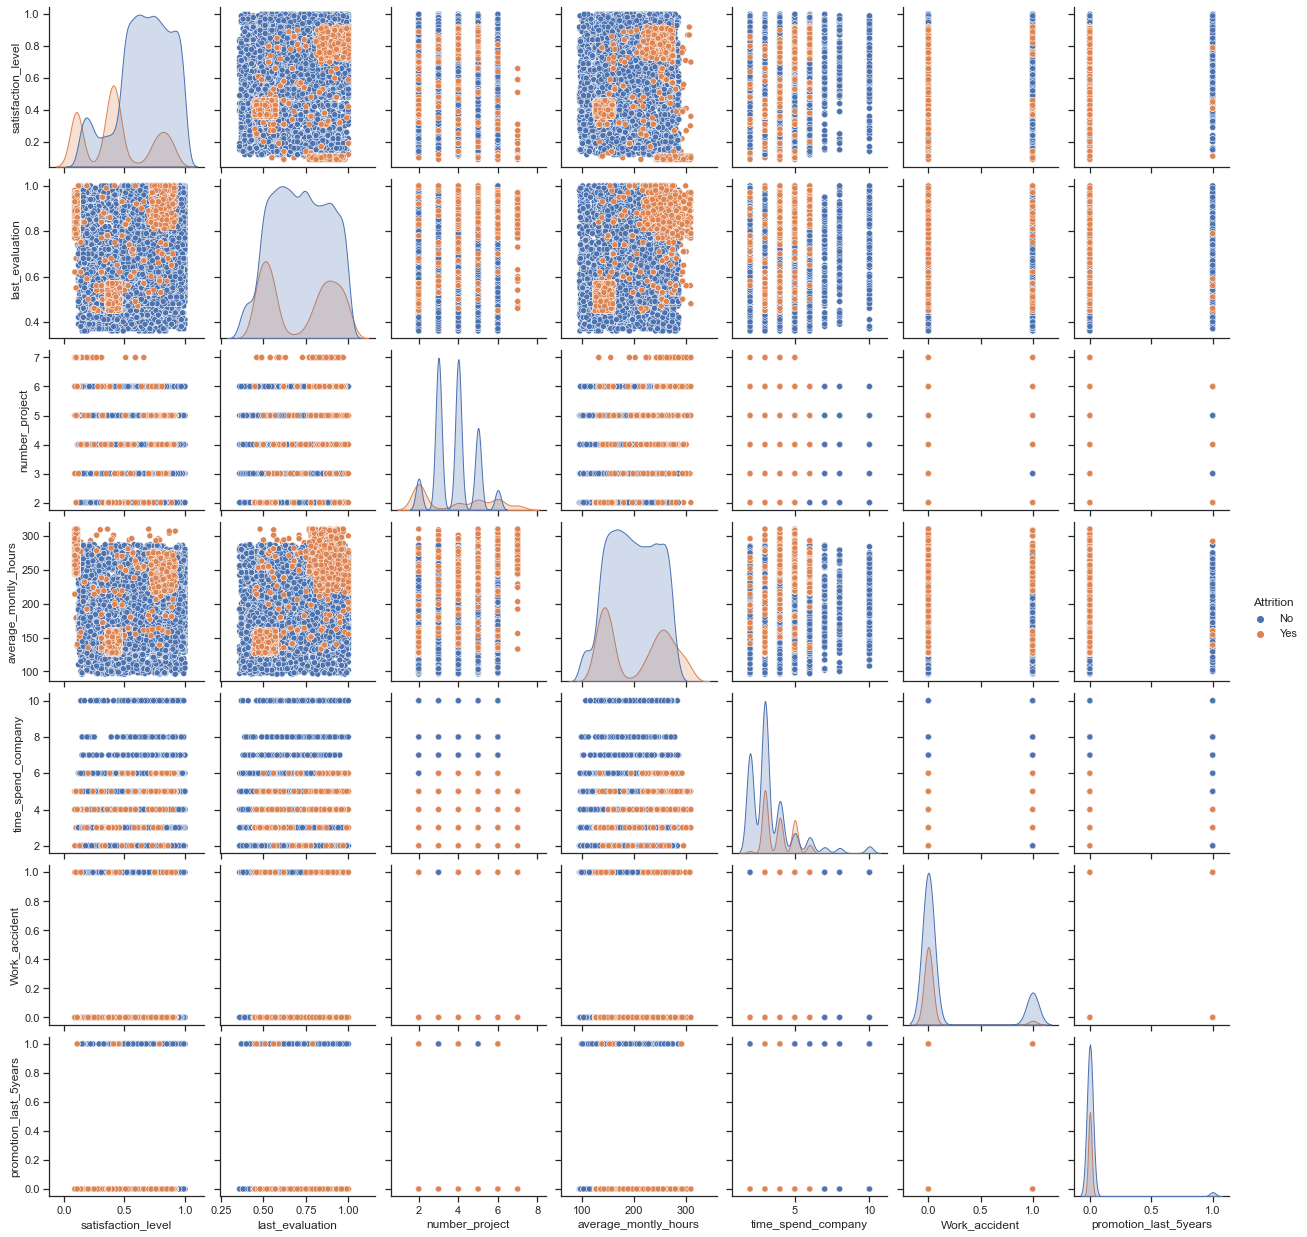

In [371]:
sns.pairplot(df, hue='Attrition', vars=['satisfaction_level','last_evaluation','number_project','average_montly_hours',
             'time_spend_company','Work_accident','promotion_last_5years'])

In [372]:
#conversion of categorical to numerical
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [373]:
df['Attrition']=le.fit_transform(df['Attrition'])
df['dept']=le.fit_transform(df['dept'])
df['salary']=le.fit_transform(df['salary'])

In [374]:
df.head(10)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,1,0.38,0.53,2,157,3,0,0,7,1,1
1,2,0.80,0.86,5,262,6,0,0,7,2,1
2,3,0.11,0.88,7,272,4,0,0,7,2,1
3,4,0.72,0.87,5,223,5,0,0,7,1,1
4,5,0.37,0.52,2,159,3,0,0,7,1,1
5,6,0.41,0.50,2,153,3,0,0,7,1,1
6,7,0.10,0.77,6,247,4,0,0,7,1,1
7,8,0.92,0.85,5,259,5,0,0,7,1,1
8,9,0.89,1.00,5,224,5,0,0,7,1,1
9,10,0.42,0.53,2,142,3,0,0,7,1,1


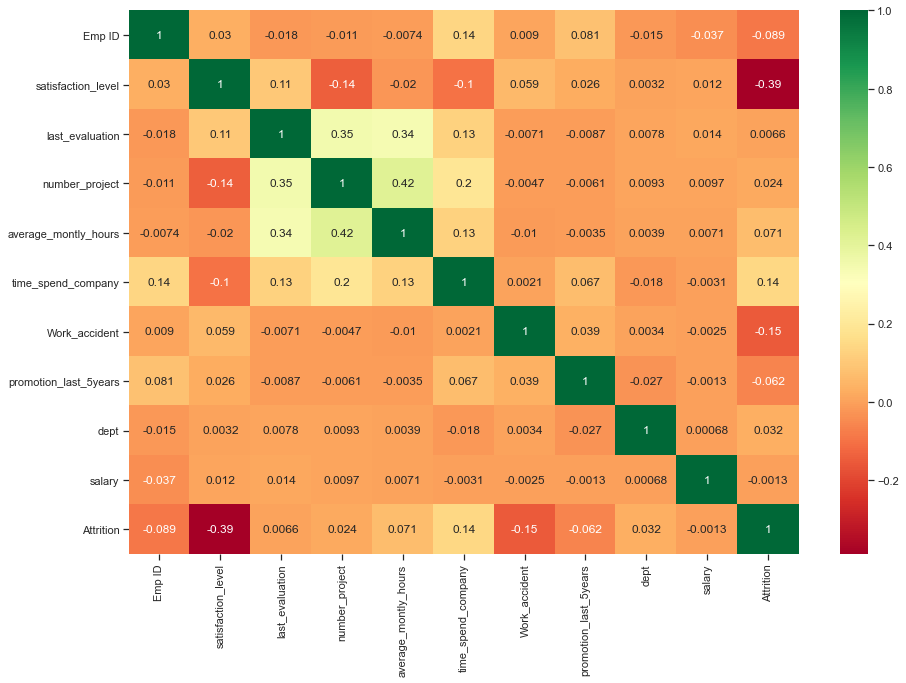

In [375]:
plt.figure(figsize=(15,10))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [376]:
df.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Attrition'],
      dtype='object')

In [377]:
#selection of moderate correlation features with 0.3

#'satisfaction_level', 'number_project','last_evaluation','average_montly_hours']]

In [378]:
from sklearn.model_selection import train_test_split

In [379]:
X = df.drop(['Emp ID','Attrition','time_spend_company', 'Work_accident','promotion_last_5years', 'dept', 'salary'], axis=1)
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=101)

In [380]:
X_test.shape

(3750, 4)

In [381]:
X_train.shape

(11249, 4)

In [382]:
y_test.shape

(3750,)

In [383]:
y_train.shape

(11249,)

In [384]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [385]:
from sklearn.svm import SVC
model_svm = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5,probability=True)
model_svm.fit(X_train, y_train)

SVC(C=5, coef0=1, degree=2, gamma='auto', kernel='poly', probability=True)

In [386]:
model= model_svm.predict(X_test)

In [387]:
from sklearn.metrics import roc_curve, roc_auc_score
def perfomance_record(clf):
    pred = clf.predict(X_test) 
    fpr, tpr, threshold = roc_curve(y_test, model_svm.predict_proba(X_test)[:,1])
    roc_auc_score_ = roc_auc_score(y_test,pred)
    plt.figure()
    plt.plot(fpr,tpr, label="Roc_AUC_score (area = %0.2f)" %roc_auc_score_)
    plt.plot([0,1],[0,1], "b--")
    plt.xlabel('True postive rate')
    plt.ylabel('False Postive rate')
    plt.legend(loc="lower right")

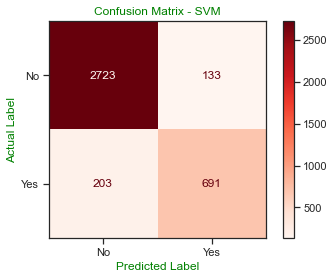

In [388]:
from sklearn.metrics import plot_confusion_matrix
classNames = ['No', 'Yes']
color ='green'
matrix = plot_confusion_matrix(model_svm, X_test,y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix - SVM', color = color)

plt.xlabel('Predicted Label', color =color)
plt.ylabel('Actual Label', color = color)

tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames)
plt.yticks(tick_marks,classNames)

plt.show()

In [389]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2856
           1       0.84      0.77      0.80       894

    accuracy                           0.91      3750
   macro avg       0.88      0.86      0.87      3750
weighted avg       0.91      0.91      0.91      3750



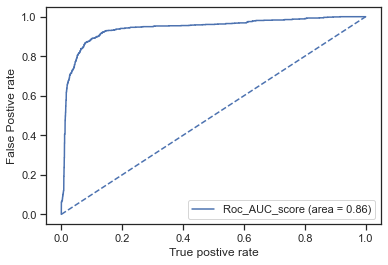

In [390]:
perfomance_record(model_svm)